In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score
import joblib

In [5]:
data=pd.read_csv('2data_merged_ens.csv')
print(data.head())


   Unnamed: 0    HR_mean     HR_std      meanNN        SDNN  medianNN  \
0           0  78.203767  16.457289  799.908981  158.135742   843.750   
1           1  72.096251  11.672067  852.073598  125.751932   859.375   
2           2  76.301325  14.232133  809.561966  126.541834   843.750   
3           3  75.322112  13.065249  817.103795  120.573088   843.750   
4           4  72.774814   9.315642  837.264151  102.344547   828.125   

       meanSD        SDSD       RMSSD     pNN20  ...         SD1  \
0  170.343137  154.548174  230.004179  0.011328  ...  163.440523   
1  124.410377  134.049706  182.885936  0.011198  ...  129.933560   
2  106.546336  113.094825  155.378767  0.012240  ...  110.336709   
3   98.536036   97.494495  138.616475  0.012109  ...   98.453860   
4  106.250000  112.599163  154.814838  0.011068  ...  109.994850   

            SD2            pA        pQ      ApEn    shanEn    sampEn  \
0  80138.413658  1.309786e+07  0.002039  0.098877  4.796612  1.500487   
1  506

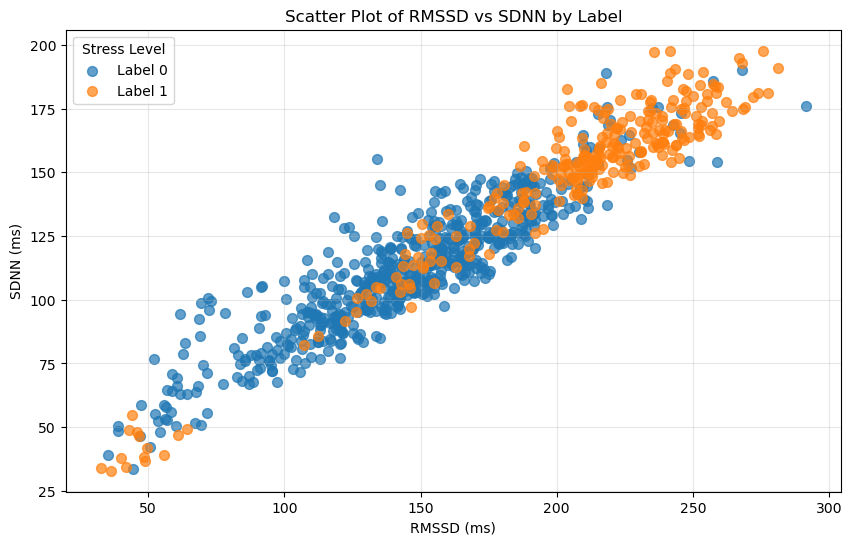

In [6]:

selected_features = ["RMSSD", "SDNN", "label"]
filtered_data = data[selected_features]

plt.figure(figsize=(10, 6))

for label in filtered_data["label"].unique():
    subset = filtered_data[filtered_data["label"] == label]
    plt.scatter(
        subset["RMSSD"], 
        subset["SDNN"], 
        label=f"Label {label}",  # Add label to legend
        alpha=0.7,  # Transparency to prevent overlap
        s=50  # Size of the points
    )
plt.title("Scatter Plot of RMSSD vs SDNN by Label")
plt.xlabel("RMSSD (ms)")
plt.ylabel("SDNN (ms)")
plt.legend(title="Stress Level")
plt.grid(True, alpha=0.3)
plt.show()


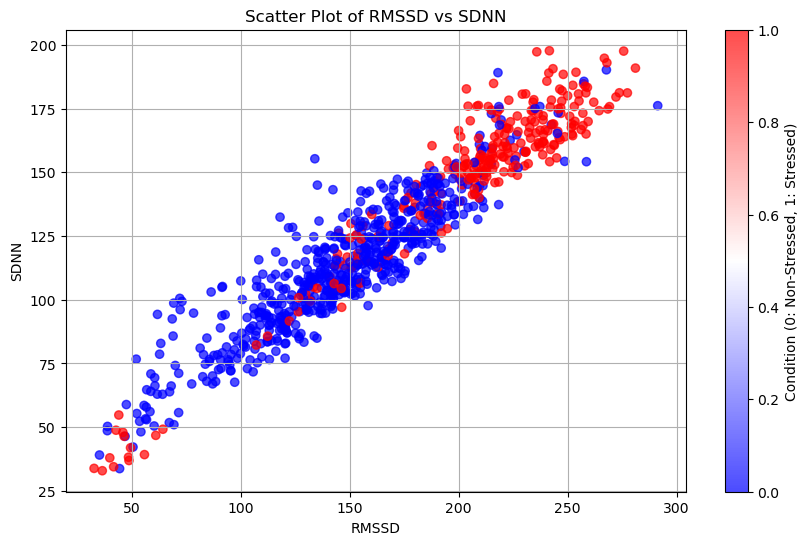

In [14]:

plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['RMSSD'], data['SDNN'], 
                      c=data['label'], cmap='bwr', alpha=0.7)
plt.title('Scatter Plot of RMSSD vs SDNN')
plt.xlabel('RMSSD')
plt.ylabel('SDNN')
plt.colorbar(scatter, label='Condition (0: Non-Stressed, 1: Stressed)')
plt.grid(True)
plt.show()


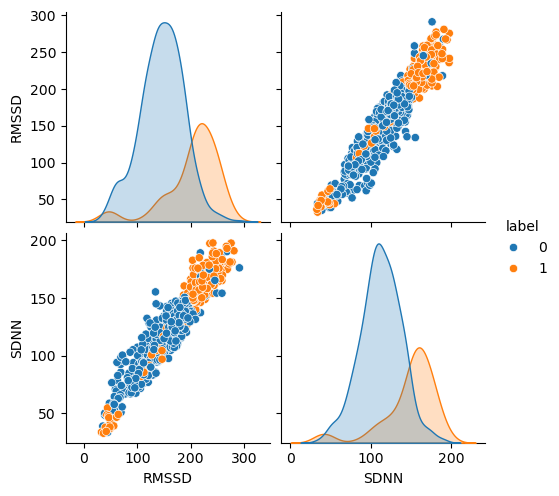

In [15]:

sns.pairplot(filtered_data, hue="label", diag_kind="kde")
plt.show()

In [9]:
ft=["HR_mean", "RMSSD", "SDNN", "label"]
filtered_data = data[ft]
X = filtered_data.drop(columns=["label"])  
y = filtered_data["label"]  

print(X.head())
print(y.value_counts())

     HR_mean       RMSSD        SDNN
0  78.203767  230.004179  158.135742
1  72.096251  182.885936  125.751932
2  76.301325  155.378767  126.541834
3  75.322112  138.616475  120.573088
4  72.774814  154.814838  102.344547
label
0    616
1    271
Name: count, dtype: int64


In [10]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [18]:
y_pred=model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 89.33%

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       125
           1       0.84      0.79      0.82        53

    accuracy                           0.89       178
   macro avg       0.88      0.86      0.87       178
weighted avg       0.89      0.89      0.89       178


Confusion Matrix:
[[117   8]
 [ 11  42]]


In [19]:
importances = model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:\n", feature_importance_df)


Feature Importances:
    Feature  Importance
2     SDNN    0.364813
1    RMSSD    0.346018
0  HR_mean    0.289168


In [20]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-validated scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean()}")


Cross-validated scores: [0.88202247 0.91573034 0.68926554 0.84180791 0.9039548 ]
Mean CV score: 0.8465562115152669


In [21]:
joblib.dump(model,"rfWesad.pkl")

['rfWesad.pkl']

In [13]:
loaded_model = joblib.load('rfWesad.pkl')

In [24]:
raw_data = {
    'HR_mean': [71.71, 73.53, 77.2,77.2],  # Example HR_mean values
    'RMSSD': [0.223 * 1000 / 2, 0.3408 * 1000 / 2, 0.30 * 1000 / 2,250],  # Example RMSSD values
    'SDNN': [0.2997 * 1000 / 2, 0.2280 * 1000 / 2, 0.27 * 1000 / 2,250]   # Example SDNN values
}

raw_df = pd.DataFrame(raw_data)
print(raw_df)
predictions = loaded_model.predict(raw_df)
print(f"Predictions: {predictions}")

   HR_mean  RMSSD    SDNN
0    71.71  111.5  149.85
1    73.53  170.4  114.00
2    77.20  150.0  135.00
3    77.20  250.0  250.00
Predictions: [0 0 0 1]


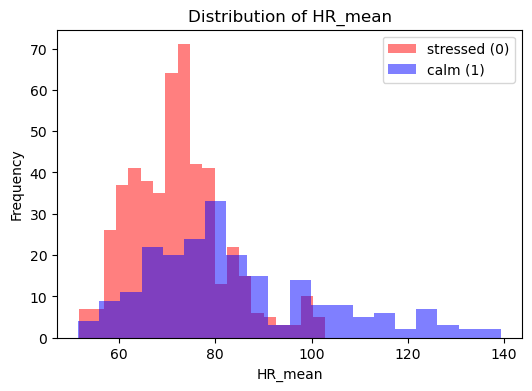

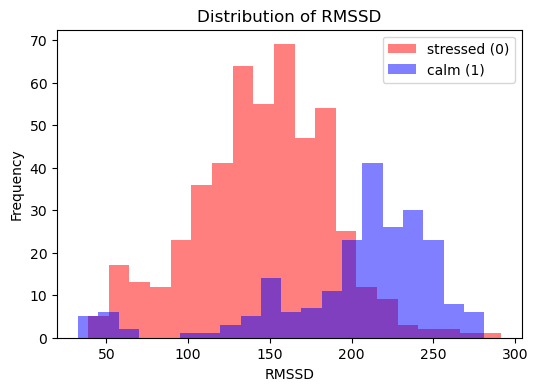

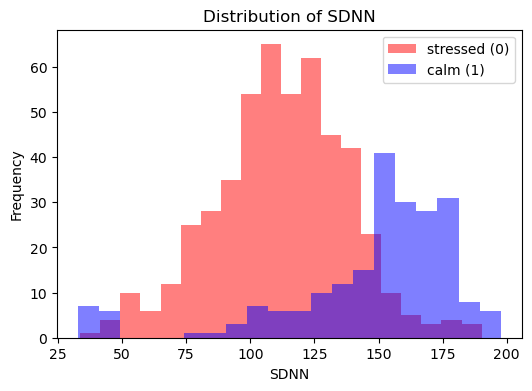

In [11]:
# Combine X_train and y_train for plotting
train_combined = pd.concat([X_train, y_train], axis=1)

for feature in ['HR_mean', 'RMSSD', 'SDNN']:
    plt.figure(figsize=(6, 4))
    
    plt.hist(train_combined[train_combined['label'] == 0][feature], bins=20, alpha=0.5, label='stressed (0)', color='red')
    
    plt.hist(train_combined[train_combined['label'] == 1][feature], bins=20, alpha=0.5, label='calm (1)', color='blue')

    # Add labels and title
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()
